In [12]:
"""
Generate speaker embeddings and metadata for training
"""
import os
import pickle
from model_bl import D_VECTOR
from collections import OrderedDict
import matplotlib.pyplot as plt
import numpy as np
import torch

C = D_VECTOR(dim_input=80, dim_cell=768, dim_emb=256).eval()
c_checkpoint = torch.load('./../data/3000000-BL.ckpt', map_location=torch.device('cpu'))
new_state_dict = OrderedDict()
for key, val in c_checkpoint['model_b'].items():
    new_key = key[7:]
    new_state_dict[new_key] = val
C.load_state_dict(new_state_dict)
num_uttrs = 10
len_crop = 128

# Directory containing mel-spectrograms
rootDir = './../data/spmel_test/'
dirName, subdirList, _ = next(os.walk(rootDir))
print('Found directory: %s' % dirName)


speakers = []
for speaker in sorted(subdirList):
    print('Processing speaker: %s' % speaker)
    utterances = []
    utterances.append(speaker)
    _, _, fileList = next(os.walk(os.path.join(dirName,speaker)))
    
    # make speaker embedding
    assert len(fileList) >= num_uttrs
    idx_uttrs = np.random.choice(len(fileList), size=num_uttrs, replace=False)
    embs = []
    for i in range(num_uttrs):
        fileName = os.path.join(dirName, speaker, fileList[idx_uttrs[i]])
        tmp = np.load(os.path.join(dirName, speaker, fileList[idx_uttrs[i]]))
        candidates = np.delete(np.arange(len(fileList)), idx_uttrs)
        # choose another utterance if the current one is too short
        while tmp.shape[0] < len_crop:
            idx_alt = np.random.choice(candidates)
            tmp = np.load(os.path.join(dirName, speaker, fileList[idx_alt]))
            fileName = os.path.join(dirName, speaker, fileList[idx_uttrs[i]])
            candidates = np.delete(candidates, np.argwhere(candidates==idx_alt))
#         left = np.random.randint(0, tmp.shape[0]-len_crop)
        melsp = torch.from_numpy(tmp[np.newaxis, :, :])
        emb = C(melsp)
        embs.append(emb.detach().squeeze().cpu().numpy())    
    utterances.append(np.mean(embs, axis=0))
    utterances.append(tmp)
    utterances.append(fileName)
    speakers.append(utterances)
with open(os.path.join(rootDir, 'test_metadata_final.pkl'), 'wb') as handle:
    pickle.dump(speakers, handle)

Found directory: ./../data/spmel_test/
Processing speaker: id10270
Processing speaker: id10271
Processing speaker: id10272
Processing speaker: id10273
Processing speaker: id10274
Processing speaker: id10275
Processing speaker: id10276
Processing speaker: id10277
Processing speaker: id10278
Processing speaker: id10279
Processing speaker: id10280
Processing speaker: id10281
Processing speaker: id10282
Processing speaker: id10283
Processing speaker: id10284
Processing speaker: id10285
Processing speaker: id10286
Processing speaker: id10287
Processing speaker: id10288
Processing speaker: id10289
Processing speaker: id10290
Processing speaker: id10291
Processing speaker: id10292
Processing speaker: id10293
Processing speaker: id10294
Processing speaker: id10295
Processing speaker: id10296
Processing speaker: id10297
Processing speaker: id10298
Processing speaker: id10299
Processing speaker: id10300
Processing speaker: id10301
Processing speaker: id10302
Processing speaker: id10303
Processin

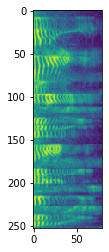

In [11]:
plt.imshow(utterances[2])